In [27]:
import pandas as pd 
import numpy as np
import talib as ta
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

import warnings
warnings.filterwarnings("ignore")

In [2]:
stock_code="RELIANCE.NS"

In [3]:
df_train=yf.download(stock_code,start='2000-01-01',end='2020-12-31',progress=False)
df_train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,36.747459,38.944569,36.747459,38.944569,29.773567,28802010
2000-01-04,39.981236,42.062302,38.882679,42.062302,32.157112,61320457
2000-01-05,39.710464,44.545658,39.710464,43.710136,33.416901,173426953
2000-01-06,44.715855,46.526150,44.715855,45.543640,34.818642,101355113
2000-01-07,45.644211,49.187443,45.334759,48.669109,37.208092,128426756


In [4]:
df_val=yf.download(stock_code,start='2021-01-01',end='2021-12-31',progress=False)
df_val.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,1988.000000,1997.000000,1982.000000,1987.500000,1981.126831,4622002
2021-01-04,1995.099976,1998.900024,1968.000000,1990.849976,1984.466064,11312992
2021-01-05,1969.000000,1983.599976,1956.000000,1966.099976,1959.795410,11132803
2021-01-06,1965.900024,1966.000000,1905.150024,1914.250000,1908.111694,21414270
2021-01-07,1920.500000,1945.000000,1905.150024,1911.150024,1905.021729,14918406


In [5]:
scaler  = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(df_train)
val_scaled = scaler.fit_transform(df_val)

In [6]:
x_train=train_scaled[:,0]
y_train=train_scaled[:,3]
x_val=val_scaled[:,0]
y_val=val_scaled[:,3]

In [7]:
train_size=x_train.shape[0]
val_size=x_val.shape[0]

In [8]:
X_train = np.reshape(x_train, (train_size, 1, 1))
Y_train = np.reshape(y_train, (train_size, 1))
X_val = np.reshape(x_val, (val_size, 1, 1))
Y_val = np.reshape(y_val, (val_size, 1))

In [9]:
model = Sequential()
     
# Adding fist LSTM layer and Drop out Regularization
model.add(LSTM(units=500, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(.2))
     
# Adding 2nd layer with some drop out regularization
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(.2))
    
# Adding 3rd layer with some drop out regularization
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(.2))
     
# Adding 4th layer with some drop out regularization
model.add(LSTM(units=500, return_sequences=False))
model.add(Dropout(.2))
     
# Output layer
model.add(Dense(units=1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 500)            1004000   
                                                                 
 dropout (Dropout)           (None, 1, 500)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 500)            2002000   
                                                                 
 dropout_1 (Dropout)         (None, 1, 500)            0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 500)            2002000   
                                                                 
 dropout_2 (Dropout)         (None, 1, 500)            0         
                                                                 
 lstm_3 (LSTM)               (None, 500)               2

In [11]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
r = model.fit(x=X_train, y=Y_train , validation_data=(X_val,Y_val) , batch_size=32, epochs=50)

Epoch 1/50
164/164 [==============================] - 15s 64ms/step - loss: 0.0176 - val_loss: 0.0023
Epoch 2/50
164/164 [==============================] - 9s 57ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 3/50
164/164 [==============================] - 10s 59ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 4/50
164/164 [==============================] - 9s 55ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 5/50
164/164 [==============================] - 9s 56ms/step - loss: 9.8640e-04 - val_loss: 0.0030
Epoch 6/50
164/164 [==============================] - 9s 55ms/step - loss: 9.4540e-04 - val_loss: 0.0025
Epoch 7/50
164/164 [==============================] - 9s 57ms/step - loss: 8.3850e-04 - val_loss: 0.0020
Epoch 8/50
164/164 [==============================] - 9s 55ms/step - loss: 4.1781e-04 - val_loss: 0.0017
Epoch 9/50
164/164 [==============================] - 9s 56ms/step - loss: 2.5004e-04 - val_loss: 0.0018
Epoch 10/50
164/164 [==============================] - 9s 56ms/step -

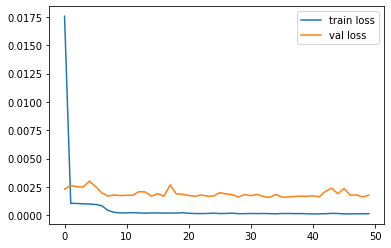

In [13]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [14]:
df_test=yf.download(stock_code,start='2022-01-01',end='2022-06-30',progress=False)
df_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,2365.000000,2407.949951,2363.550049,2403.850098,2403.850098,2502073
2022-01-04,2415.899902,2461.000000,2404.000000,2458.100098,2458.100098,5006225
2022-01-05,2462.000000,2477.000000,2432.949951,2469.600098,2469.600098,5373618
2022-01-06,2451.199951,2454.000000,2409.000000,2416.500000,2416.500000,6667483
2022-01-07,2430.949951,2458.050049,2411.550049,2436.000000,2436.000000,6051239


In [15]:
test_scaled = scaler.fit_transform(df_test)

In [16]:
x_test=test_scaled[:,0]

In [17]:
test_size=x_test.shape[0]

In [18]:
X_test=np.reshape(x_test, (test_size,1,1))

In [19]:
predicted_stock_price = model.predict(X_test)

In [20]:
predicted_stock_price=predicted_stock_price.reshape((test_size,))
predicted_stock_price.shape

(122,)

In [21]:
test_scaled[:,3]=predicted_stock_price

In [22]:
stock_price = scaler.inverse_transform(test_scaled)

In [23]:
mse = mean_squared_error(df_test['Close'], stock_price[:,3])
print(mse)

1700.5135711987627


In [24]:
mae = mean_absolute_error(df_test['Close'], stock_price[:,3])
print(mae)

32.69320313706297


### Plot of predicted and actual price

In [25]:
df_test['Predicted_Value']=stock_price[:,3]

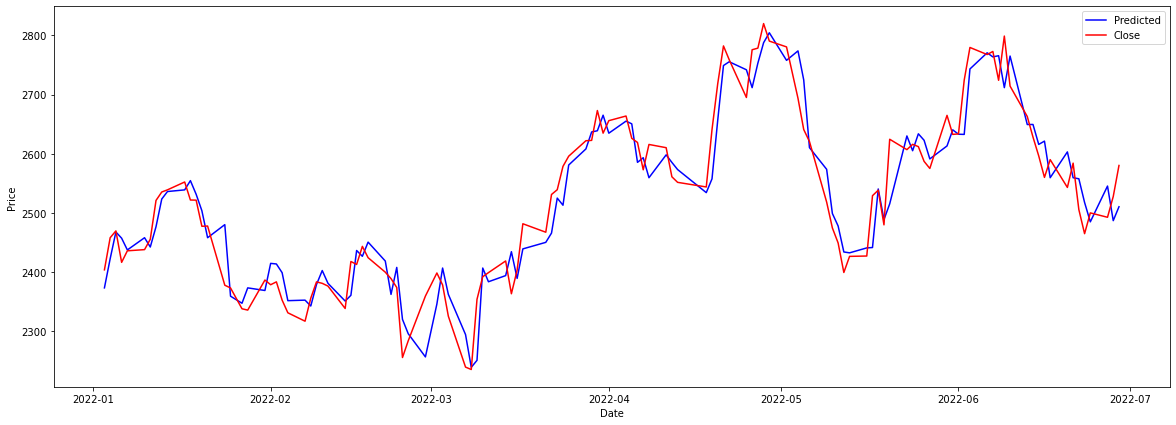

In [26]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.plot(df_test['Predicted_Value'],label='Predicted',color='b')
plt.plot(df_test['Close'],label='Close',color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()